# Supervised Learning - WALMART SALES PREDICTION
## Context

Walmart is a notable retail firm that maintains a series of hypermarkets. Here, Walmart has supplied a data merging of 45 stores with store information and monthly sales. The data is supplied on a weekly basis. From the dataset, there are certain events and holidays which may impact sales on each day. We aim to determine the influence of holidays on the sales of the stores. For which Walmart has added four holidays’ weeks into the dataset which are Christmas, Thanksgiving, Super bowl, and Labor Day. Here we are going to Analyze the dataset supplied based on our objectives.



 
## Objective
Understand the Dataset & cleanup the Dataset (where required). Build models to predict the sales of store Evaluate the models & compare their respective scores.



 
## Data Description
The detailed data dictionary is given below.

**Data Dictionary Features**
#Store - The store number
#Date - The week of sales
#Weekly_Sales - sales for the given store
#Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
#Temperature - Temperature on the day of sale
#Fuel_Price - Cost of fuel in the region
#CPI – Prevailing consumer price index
#Unemployment - Prevailing unemployment rate

In [ ]:
#from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Store - The store number
#Date - The week of sales
#Weekly_Sales - sales for the given store
#Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
#Temperature - Temperature on the day of sale
#Fuel_Price - Cost of fuel in the region
#CPI – Prevailing consumer price index
#Unemployment - Prevailing unemployment rate

## Importing necessary libraries and data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline 

In [ ]:
df = pd.read_csv('Walmart.csv')

## Data Overview

- Observations
- Sanity checks

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Exploratory Data Analysis (EDA)


**Questions**:

> List possible questions to be answered


In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05/02/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/02/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19/02/2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26/02/2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05/03/2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05/10/2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12/10/2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19/10/2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
#Checking dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#Getting the statistical data of dataframe
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
#Checking type
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
#checking the shape of the dataframe
df.shape

(6435, 8)

In [ ]:
#Checking number of unique rows in each feature in ascending order
df.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [ ]:
#checking for null values
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
#checking for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [ ]:
df.duplicated().sum()

0

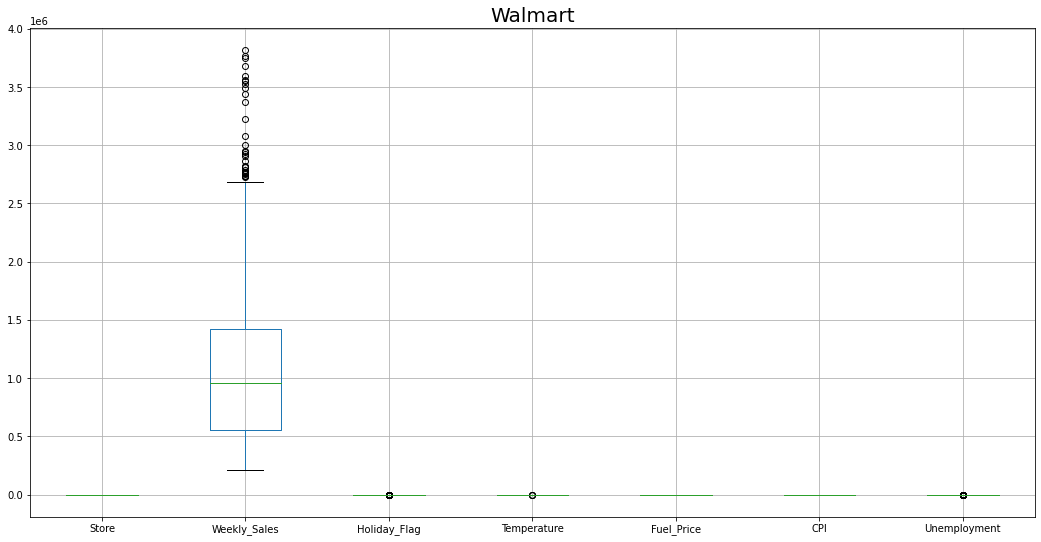

In [ ]:
#checking for outliers using boxplot
plt.figure(figsize=(18,9))
df.boxplot()
plt.title("Walmart", fontsize=20)
plt.show()

In [ ]:
#Finding the Position of the Outliers
print(np.where(df['Weekly_Sales']>2.746965e+06))

(array([ 189,  241,  471,  475,  523,  526,  527, 1329, 1332, 1333, 1381,
       1385, 1758, 1761, 1762, 1810, 1813, 1814, 1901, 1904, 1905, 1957,
       2759, 2761, 2762, 2763, 2811, 2814, 2815, 3764]),)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



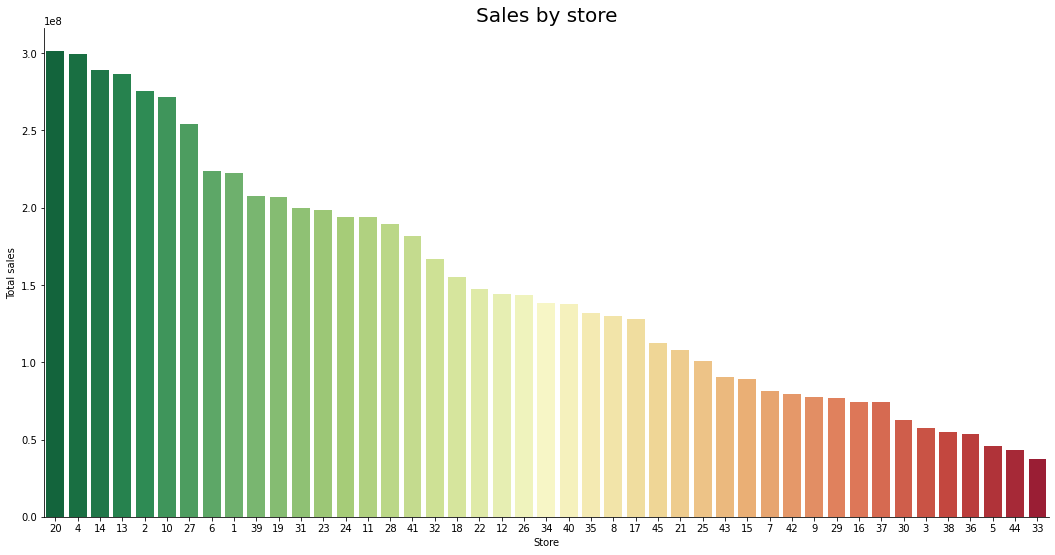

In [ ]:
#Total sales made by each store
sales_by_store=df.groupby("Store")["Weekly_Sales"].sum().reset_index(name="Total sales").sort_values(by="Total sales",ascending=False)
plt.figure(figsize=(18,9))
sns.barplot(sales_by_store["Store"],sales_by_store["Total sales"],palette="RdYlGn_r",order=sales_by_store["Store"].tolist())
sns.despine()
plt.title("Sales by store",fontsize=20)
plt.show()

In [ ]:
df.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [ ]:
df.Holiday_Flag.unique()

array([0, 1])

In [ ]:
#Checking to see if the date format is uniform
df['Date'].unique()

array(['05/02/2010', '12/02/2010', '19/02/2010', '26/02/2010',
       '05/03/2010', '12/03/2010', '19/03/2010', '26/03/2010',
       '02/04/2010', '09/04/2010', '16/04/2010', '23/04/2010',
       '30/04/2010', '07/05/2010', '14/05/2010', '21/05/2010',
       '28/05/2010', '04/06/2010', '11/06/2010', '18/06/2010',
       '25/06/2010', '02/07/2010', '09/07/2010', '16/07/2010',
       '23/07/2010', '30/07/2010', '06/08/2010', '13/08/2010',
       '20/08/2010', '27/08/2010', '03/09/2010', '10/09/2010',
       '17/09/2010', '24/09/2010', '01/10/2010', '08/10/2010',
       '15/10/2010', '22/10/2010', '29/10/2010', '05/11/2010',
       '12/11/2010', '19/11/2010', '26/11/2010', '03/12/2010',
       '10/12/2010', '17/12/2010', '24/12/2010', '31/12/2010',
       '07/01/2011', '14/01/2011', '21/01/2011', '28/01/2011',
       '04/02/2011', '11/02/2011', '18/02/2011', '25/02/2011',
       '04/03/2011', '11/03/2011', '18/03/2011', '25/03/2011',
       '01/04/2011', '08/04/2011', '15/04/2011', '22/04

In [ ]:
#Finding the correlation between columns
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


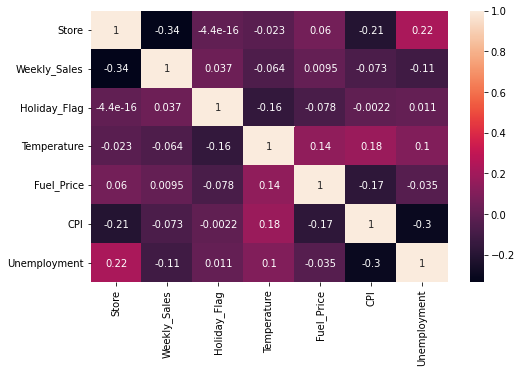

In [ ]:
#visualization the correlation between columns
plt.figure(figsize = (8, 5))
sns.heatmap(df.corr(), annot = True)
plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
#change date datatype
df.Date = pd.to_datetime(df.Date)

In [ ]:
# Extract the day, month, year from the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year']  = df['Date'].dt.year

In [ ]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,3,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,0,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,10,2012
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,4,10,2012


In [ ]:
# Converting the numerical values to categorical values in the day, month, year columns
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df['day'] = df['day'].map(days)

months={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',7:'July', 8:'August', 9:'September',10:'October',11:'November', 12:'December'}
df['month']= df['month'].map(months)

holidays = {0:'No Holiday',1:'Holiday'}
df['Holiday'] = df['Holiday_Flag'].map(holidays)

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,Holiday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,No Holiday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,Holiday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,No Holiday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,No Holiday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,No Holiday


sort sales by date

In [ ]:
# Total yearly sales
year_sales=df.groupby('year')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()
year_sales

,Weekly_Sales
year,
2011,2.448200e+09
2010,2.288886e+09
2012,2.000133e+09


<Figure size 1800x1080 with 0 Axes>

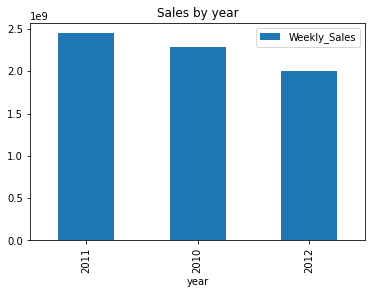

In [ ]:
#split year and month from the Date column
df['year'],df['month'] = df['Date'].dt.year,df['Date'].dt.month
#visualize the sales by year
plt.figure(figsize=[25,15])
year_sales.plot(kind = 'bar', title= 'Sales by year');


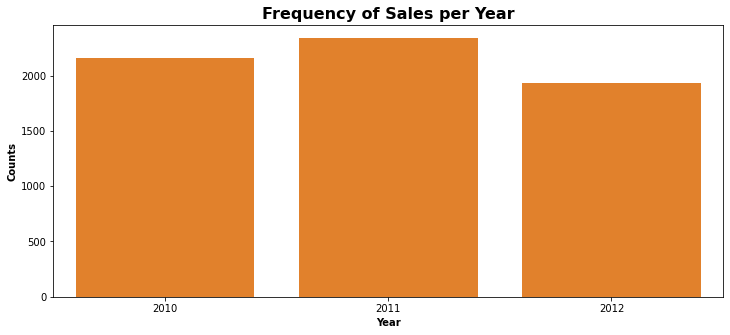

In [ ]:
#visualize the sales by year
plt.figure(figsize=(12,5))
base_color = sns.color_palette()[1]
sns.countplot(data=df, x='year', color=base_color)
plt.title('Frequency of Sales per Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontweight='bold');
plt.ylabel('Counts',fontweight='bold');

In [ ]:
#checking for month with the highest sales
month_sales= df.groupby(['month'])['Weekly_Sales'].max().sort_values(ascending = False).to_frame()
month_sales

,Weekly_Sales
month,
12,3818686.45
11,3004702.33
10,2752122.08
5,2623469.95
6,2565259.92
9,2546123.78
2,2495630.51
3,2416051.17
7,2370116.52


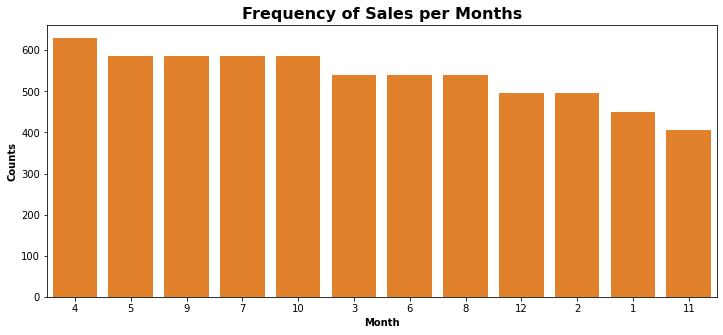

In [ ]:
#visualize the sales per months
order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September','October','November','December']
plt.figure(figsize=(12,5))
base_color = sns.color_palette()[1]
sns.countplot(data=df, x='month', color=base_color, order=df['month'].value_counts().index)
plt.title('Frequency of Sales per Months', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontweight='bold');
plt.ylabel('Counts',fontweight='bold');

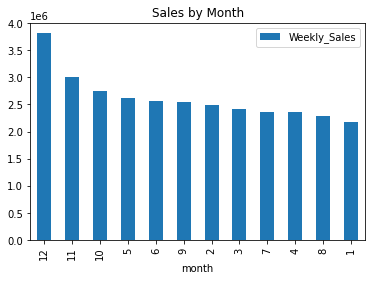

In [ ]:
#visualize the sales by month
month_sales.plot(kind = 'bar', title= 'Sales by Month');

In [ ]:
#checking for day with the highest sales
day_sales= df.groupby(['day'])['Weekly_Sales'].sum().sort_values(ascending = False).to_frame()
day_sales

,Weekly_Sales
day,
Thursday,4.486257e+09
Sunday,5.390133e+08
Wednesday,4.766244e+08
Monday,4.335075e+08
Saturday,4.266091e+08
Friday,2.824947e+08
Tuesday,9.271282e+07


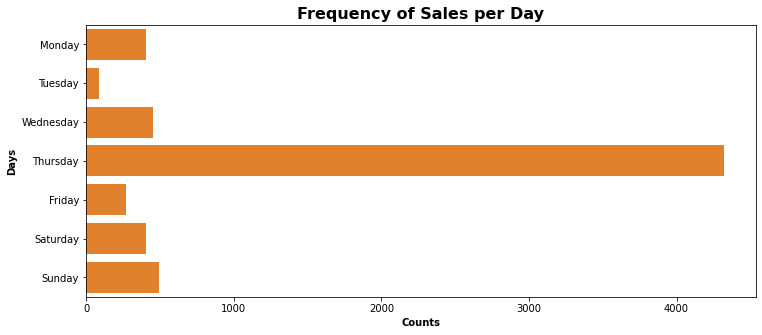

In [ ]:
#visualize the sales per days
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12,5))
base_color = sns.color_palette()[1]
sns.countplot(data=df, y='day', color=base_color, order = order)
plt.title('Frequency of Sales per Day', fontsize=16, fontweight='bold')
plt.xlabel('Counts', fontweight='bold');
plt.ylabel('Days',fontweight='bold');

Text(0.5, 1.0, 'Total Sales Per Day')

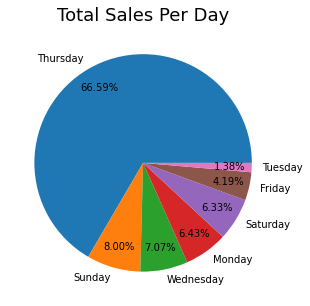

In [ ]:
plt.figure(figsize=(7,5))
plt.pie(df.groupby(['day'])['Weekly_Sales'].sum().sort_values(ascending = False), labels=day_sales.index, autopct='%.2f%%', pctdistance= 0.8)
plt.title(f'Total Sales Per Day', color='black', fontsize= 18)

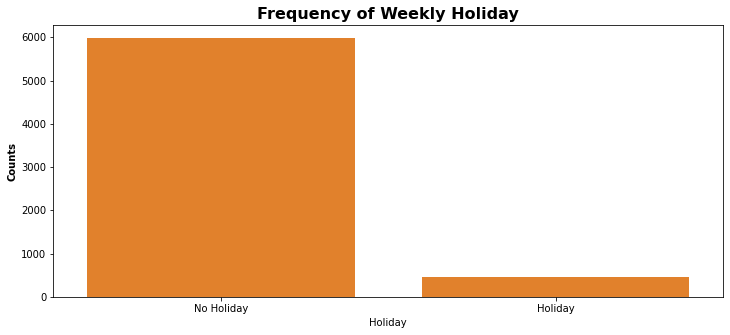

In [ ]:
#holiday count
plt.figure(figsize=(12,5))
base_color = sns.color_palette()[1]
sns.countplot(data = df, x='Holiday', color=base_color)
plt.title('Frequency of Weekly Holiday', fontsize=16, fontweight='bold')
plt.ylabel('Counts', fontweight='bold');

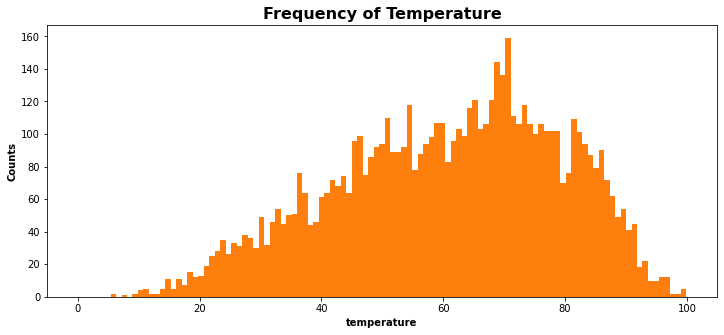

In [ ]:
plt.figure(figsize=(12,5))
base_color = sns.color_palette()[1]
bins = np.arange(0,df['Temperature'].max()+0.2,0.9)
plt.hist(data=df, x='Temperature', color=base_color,bins=bins)
plt.title('Frequency of Temperature', fontsize=16, fontweight='bold')
plt.ylabel('Counts', fontweight='bold');
plt.xlabel('temperature',fontweight='bold');

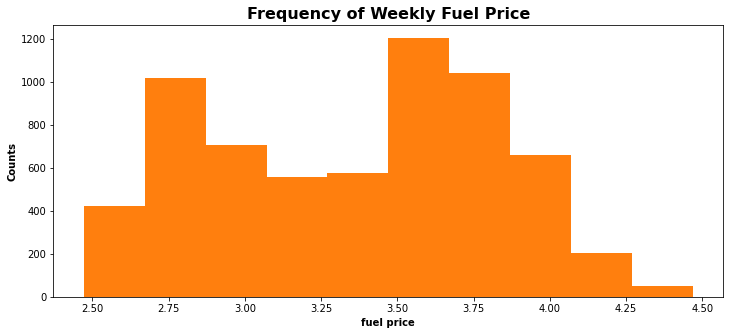

In [ ]:
plt.figure(figsize=(12,5))
base_color = sns.color_palette()[1]
plt.hist(data=df, x='Fuel_Price', color=base_color)
plt.title('Frequency of Weekly Fuel Price', fontsize=16, fontweight='bold')
plt.ylabel('Counts', fontweight='bold');
plt.xlabel('fuel price',fontweight='bold');

In [ ]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,Holiday
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Thursday,9,2012,No Holiday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,Wednesday,5,2012,No Holiday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,Sunday,12,2012,No Holiday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Thursday,10,2012,No Holiday
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,Thursday,10,2012,No Holiday


Aggregating Weekly sales based on store and holiday flag

In [ ]:
New_store = df.groupby(['Store','Holiday']).agg({'Weekly_Sales':['mean','max','sum']})
New_store = New_store.reset_index()
New_store

Store     Holiday  Weekly_Sales                          
                              mean         max           sum
0      1     Holiday  1.665748e+06  2033320.66  1.665748e+07
1      1  No Holiday  1.546957e+06  2387950.20  2.057453e+08
2      2     Holiday  2.079267e+06  2658725.29  2.079267e+07
3      2  No Holiday  1.914209e+06  3436007.68  2.545898e+08
4      3     Holiday  4.378110e+05   565567.84  4.378110e+06
..   ...         ...           ...         ...           ...
85    43  No Holiday  6.331276e+05   725043.04  8.420597e+07
86    44     Holiday  2.960356e+05   338737.33  2.960356e+06
87    44  No Holiday  3.032536e+05   376233.89  4.033273e+07
88    45     Holiday  8.362937e+05  1182500.16  8.362937e+06
89    45  No Holiday  7.821985e+05  1682862.03  1.040324e+08

[90 rows x 5 columns]

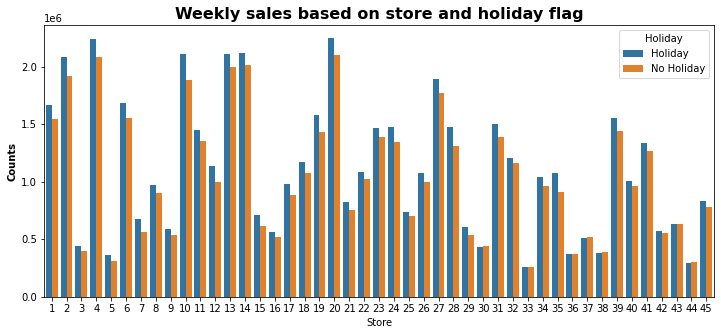

In [ ]:
#Weekly sales based on store and holiday flag
plt.figure(figsize=(12,5))
sns.barplot(x = 'Store',y = ('Weekly_Sales',  'mean'),hue= 'Holiday',data=New_store)
plt.title('Weekly sales based on store and holiday flag', fontsize=16, fontweight='bold')
plt.ylabel('Counts', fontweight='bold');

#name the different holidays
christmas


In [ ]:
#plt.figure(figsize=(15,8))
#sns.barplot(x = 'Temperature',y = 'Weekly_Sales',hue= 'Holiday',data=df)

In [ ]:
#Get the max sales by weekly sales
#Sales['max_sales']= Sales.Weekly_Sales.max()

#Sales['max_sales'].head(1)

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,Holiday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,5,2010,No Holiday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,12,2010,Holiday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,2,2010,No Holiday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,2,2010,No Holiday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,5,2010,No Holiday


In [ ]:
#Top 10 stores 
Top_stores = df.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending = False).head(10)
Top_stores.to_frame().reset_index()

,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


In [ ]:
#From the plot, store 20 is the best and 4 and 14 following it.

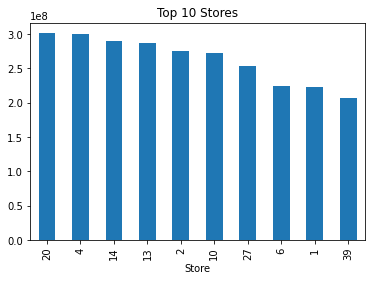

In [ ]:
#visualizing the Top10 stores
Top_stores.plot(kind = 'bar', title= 'Top 10 Stores')


In [ ]:
# Average weekly sales of the top 10 stores 
df.groupby(['Store'])['Weekly_Sales'].mean().sort_values(ascending=False).head(10).reset_index()

,Store,Weekly_Sales
0,20,2.107677e+06
1,4,2.094713e+06
2,14,2.020978e+06
3,13,2.003620e+06
4,2,1.925751e+06
5,10,1.899425e+06
6,27,1.775216e+06
7,6,1.564728e+06
8,1,1.555264e+06
9,39,1.450668e+06


In [ ]:
#FUEL PRICE, CPI, UNEMPLOYMENT EFFECTS

            Weekly_Sales
Fuel_Price              
2.472          470281.03
2.513          434471.38
2.514        14211389.79
2.520          447519.44
2.533          431294.45
...                  ...
4.294         5255081.92
4.301         5118684.85
4.308         2662689.06
4.449         5064130.51
4.468         5195825.00

[892 rows x 1 columns]


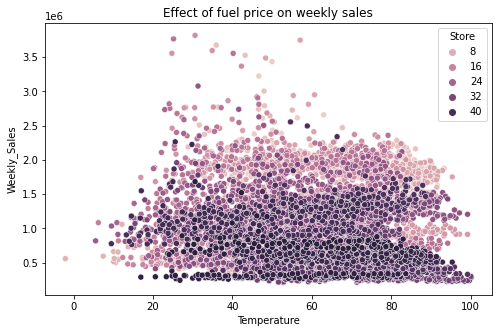

In [ ]:
# Effect of fuel price on weekly sales
print(df.groupby('Fuel_Price')['Weekly_Sales'].sum().to_frame())
#visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'Temperature', y = 'Weekly_Sales', hue = 'Store', data = df).set(title='Effect of fuel price on weekly sales')
plt.show()
fig= px.histogram(df, x='Temperature', y ='Weekly_Sales', width=500, height=500, title= 'Effect of fuel price on weekly sales', template='simple_white')
fig.show()

            Weekly_Sales
CPI                     
126.064000   11186672.61
126.076645   11236542.21
126.085452   11617124.06
126.089290   10644403.61
126.101935   11446981.89
...                  ...
227.018417     900309.75
227.036936     891671.44
227.169392     558464.80
227.214288     542009.46
227.232807     549731.49

[2145 rows x 1 columns]


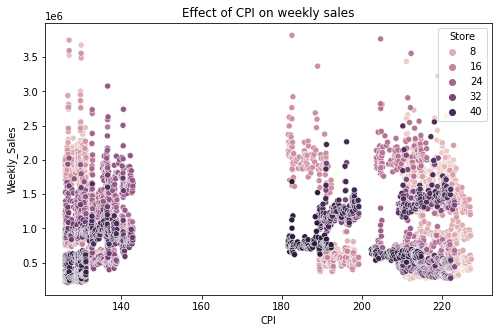

In [ ]:
# Effect of CPI on weekly sales
print(df.groupby('CPI')['Weekly_Sales'].sum().to_frame())
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'CPI', y = 'Weekly_Sales', hue = 'Store', data = df).set(title='Effect of CPI on weekly sales')
plt.show()
fig= px.histogram(df, x='CPI', y ='Weekly_Sales', width=500, height=500, title= 'Effect of CPI on weekly sales', template='simple_white')
fig.show()

      Temperature  Weekly_Sales
0           72.62   10886393.75
1           76.03   10418588.73
2           50.43   10312566.90
3           76.67    9857252.53
4           62.62    9594012.18
...           ...           ...
3523        95.28     224806.96
3524        61.95     224639.76
3525        91.45     224294.39
3526        94.00     224031.19
3527        52.91     219804.85

[3528 rows x 2 columns]


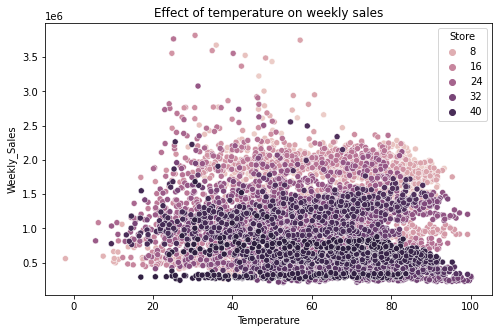

In [ ]:
# Effect of daily temperature on weekly sales
print(df.groupby('Temperature')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).reset_index())
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'Temperature', y = 'Weekly_Sales', hue = 'Store', data = df).set(title='Effect of temperature on weekly sales')
plt.show()
fig= px.histogram(df, x='Temperature', y ='Weekly_Sales', width=500, height=500, template='simple_white', title= 'Effect of temperature on weekly sales')
fig.show()

     Unemployment  Weekly_Sales
0           8.099   84045715.04
1           8.163   68057280.53
2           7.441   63874722.26
3           7.852   60331223.67
4           8.200   58491673.00
..            ...           ...
344         9.151    2086249.72
345         5.847    2016067.98
346         5.217    1360020.41
347         5.422    1301302.62
348         6.895    1065369.52

[349 rows x 2 columns]


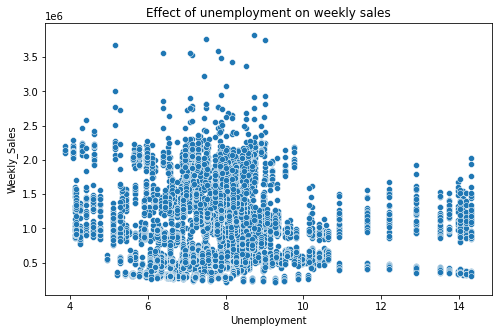

In [ ]:
# how does unemployment levels affect weekly sales
print(df.groupby('Unemployment')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).reset_index())
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'Unemployment',y = 'Weekly_Sales',data = df).set(title='Effect of unemployment on weekly sales')
plt.show()
fig= px.histogram(df, x='Unemployment', y ='Weekly_Sales', width=500, height=500, template='simple_white', title= 'Effect of unemployment on weekly sales')
fig.show()

In [ ]:

#FUEL PRICE, CPI, UNEMPLOYMENT EFFECTS 
#From graphs above, it is seen that there are no significant patterns between CPI, temperature, unemployment rate, fuel price with the weekly sales.

In [ ]:
#Holiday Events
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Text(0.5, 1.0, ' Total Yearly Sales')

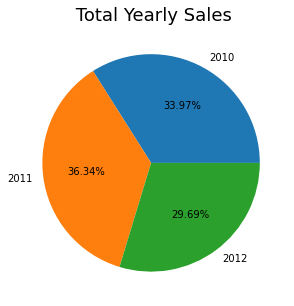

In [ ]:
 plt.figure(figsize=(7,5))
 plt.pie(df.groupby('year')['Weekly_Sales'].sum().values, labels=df.groupby('year')['Weekly_Sales'].sum().index, autopct='%.2f%%')
 plt.title(f' Total Yearly Sales', color='black', fontsize= 18)

In [ ]:
df['month']= df['month'].map(months)

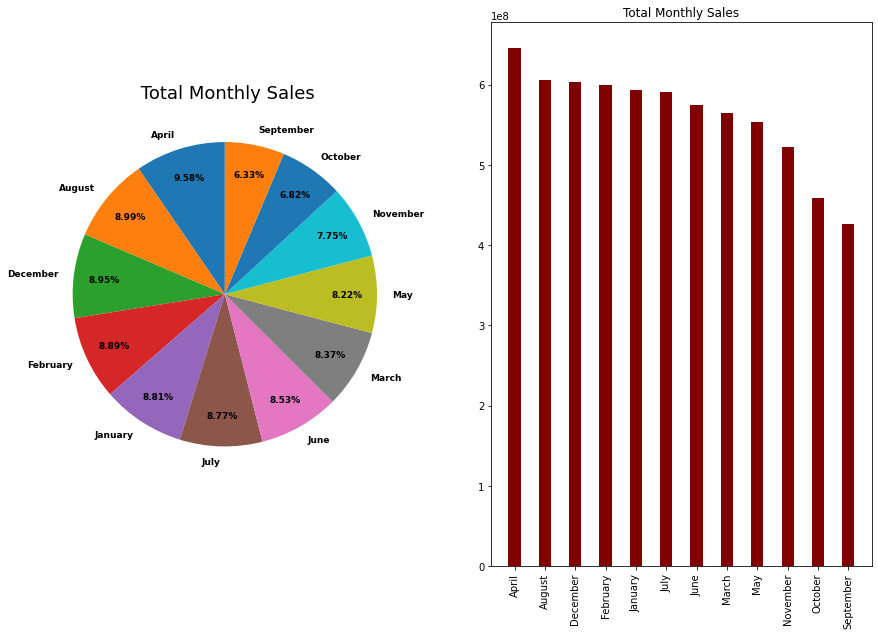

In [ ]:
Total_weekly_sales = df.groupby('month')['Weekly_Sales'].sum().sort_values(ascending= False)
month = df.groupby('month')['Weekly_Sales'].sum().index
fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].pie(df.groupby('month')['Weekly_Sales'].sum().sort_values(ascending= False), labels=df.groupby('month')['Weekly_Sales'].sum().index, pctdistance= 0.8, autopct='%.2f%%', textprops= {'fontweight':'black', 'fontsize': '9'}, startangle=90)
ax[0].set_title(f' Total Monthly Sales', color='black', fontsize= 18)
ax[1].bar(month, Total_weekly_sales, color ='maroon', width = 0.4)
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title("Total Monthly Sales")
plt.show()

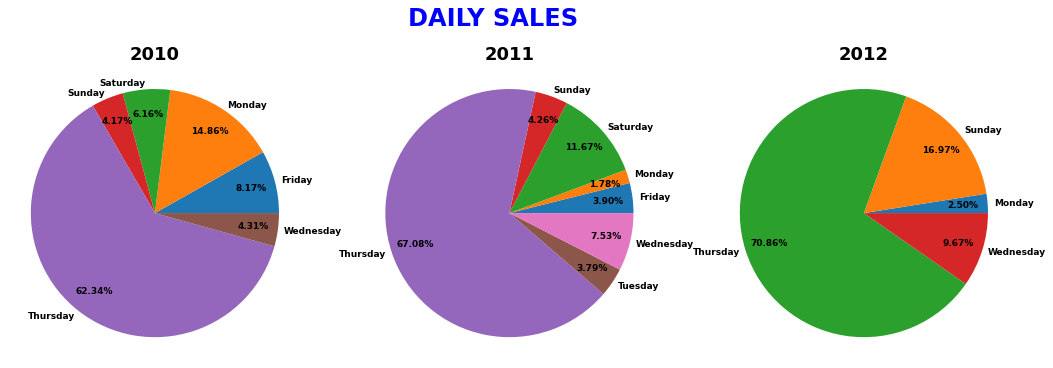

In [ ]:
# The highest daily sales in each year
fig, axs = plt.subplots(1, 3, figsize=(18,6))
textprops={"color":"black", "weight":"semibold", "fontsize": 9} 
axs[0].pie(df[df['year']==2010].groupby('day')['Weekly_Sales'].sum().values,labels = df[df['year']==2010].groupby('day')['Weekly_Sales'].sum().index, textprops=textprops, labeldistance= 1.05, radius= 1.05, autopct = '%.2f%%', pctdistance=0.8)
axs[0].set_title('2010', fontsize= 18, fontweight = 'black')

axs[1].pie(df[df['year']==2011].groupby('day')['Weekly_Sales'].sum().values,labels = df[df['year']==2011].groupby('day')['Weekly_Sales'].sum().index, textprops=textprops, labeldistance= 1.05, radius= 1.05, autopct = '%.2f%%', pctdistance=0.8)
axs[1].set_title('2011', fontsize= 18, fontweight = 'black')

axs[2].pie(df[df['year']==2012].groupby('day')['Weekly_Sales'].sum().values,labels = df[df['year']==2012].groupby('day')['Weekly_Sales'].sum().index,textprops=textprops, labeldistance= 1.05, radius= 1.05, autopct = '%.2f%%', pctdistance=0.8)
axs[2].set_title('2012', fontsize= 18, fontweight = 'black')
plt.suptitle('DAILY SALES', color='blue', fontsize= 24,fontweight = 'bold')
plt.show()

In [ ]:
#Top 3 stores with highest weekly sales in 2010, 2011 and 2012
Top3_in_2010= df[df['year']==2010].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).head(3).to_frame()
Top3_in_2011= df[df['year']==2011].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).head(3).to_frame()
Top3_in_2012= df[df['year']==2012].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).head(3).to_frame()
print('Top 3 stores in 2010')
print(Top3_in_2010.reset_index())
print()
print('Top 3 stores in 2011')
print(Top3_in_2011.reset_index())
print()
print('Top 3 stores in 2012')
print(Top3_in_2012.reset_index())

Top 3 stores in 2010
   Store  Weekly_Sales
0     14  1.054622e+08
1     20  1.017331e+08
2      4  9.568047e+07

Top 3 stores in 2011
   Store  Weekly_Sales
0      4  1.110923e+08
1     20  1.098370e+08
2     14  1.060963e+08

Top 3 stores in 2012
   Store  Weekly_Sales
0      4   92771189.24
1     20   89827709.38
2     13   86707455.02


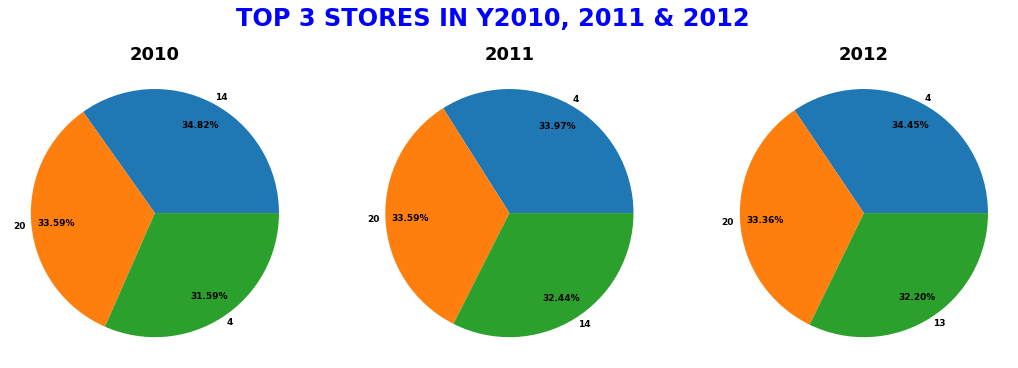

In [ ]:
#Top 3 stores with highest weekly sales in 2010, 2011 and 2012
fig, axs = plt.subplots(1, 3, figsize=(18,6))
textprops={"color":"black", "weight":"semibold", "fontsize": 9} 
axs[0].pie(df[df['year']==2010].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).head(3), labels = df[df['year']==2010].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).head(3).index, textprops=textprops, labeldistance= 1.05, radius= 1.05, autopct = '%.2f%%', pctdistance=0.8)
axs[0].set_title('2010', fontsize= 18, fontweight = 'black')
axs[1].pie(df[df['year']==2011].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).head(3), labels = df[df['year']==2011].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).head(3).index, textprops=textprops, labeldistance= 1.05, radius= 1.05, autopct = '%.2f%%', pctdistance=0.8)
axs[1].set_title('2011', fontsize= 18, fontweight = 'black')
axs[2].pie(df[df['year']==2012].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).head(3), labels = df[df['year']==2012].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).head(3).index, textprops=textprops, labeldistance= 1.05, radius= 1.05, autopct = '%.2f%%', pctdistance=0.8)
axs[2].set_title('2012', fontsize= 18, fontweight = 'black')
plt.suptitle('TOP 3 STORES IN Y2010, 2011 & 2012', color='blue', fontsize= 24,fontweight = 'bold')
plt.show()

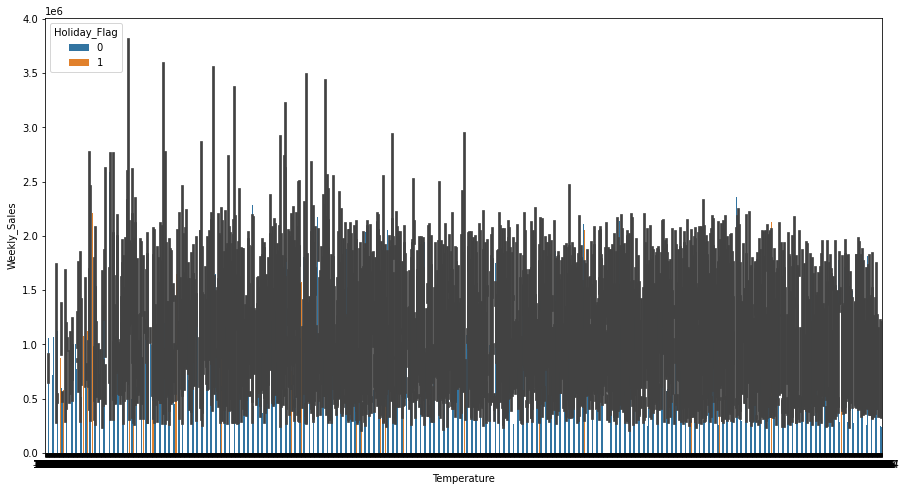

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Temperature',y = 'Weekly_Sales',hue= 'Holiday_Flag',data=df)

#Explorations & Findings

There are 45 stores 4 different holidays and weekly sales varies across all stores
in general average ,store 20 and store 4 are on the first and second rank of stores with highest weekly sales this means that some areas has higher seasonal sales.
As expected, holiday average sales are higher than normal days with no holiday. because during holidays people have little or no work Schedules hence alot of time to visit stores
year 2011 has the higher sales than year 2010 and 2012

December and November has the first and second highest total monthly sales. January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.

Thursdays has the highest weekly sales followed by Sundays and since holiday sales are higher with normal days with no holiday, Thursday can be concluded to be an holiday

Even though December has the highest total sales per month, the month of April has the highest frequency of weekly sales.

CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales.

### DATA SCALING & SPLITING

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,Holiday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,No Holiday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,Holiday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,No Holiday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,No Holiday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Thursday,September,2012,No Holiday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,Wednesday,May,2012,No Holiday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,Sunday,December,2012,No Holiday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Thursday,October,2012,No Holiday


In [ ]:
#Dropping the now redundant Date column
df.drop(['Date'], axis= 'columns', inplace= True)
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,Holiday
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,No Holiday
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,Holiday
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,No Holiday
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,No Holiday
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,Thursday,September,2012,No Holiday
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,Wednesday,May,2012,No Holiday
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,Sunday,December,2012,No Holiday
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,Thursday,October,2012,No Holiday


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_day = LabelEncoder()
le_month= LabelEncoder()
le_year = LabelEncoder()

used label encoder to encode variables

In [ ]:
df['day_x'] = le_day.fit_transform(df['day'])
df['month_x'] = le_month.fit_transform(df['month'])
df['year_x'] = le_year.fit_transform(df['year'])

In [ ]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,Holiday,day_x,month_x,year_x
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,No Holiday,2,8,0
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,Holiday,6,2,0
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,No Holiday,4,3,0
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,No Holiday,4,3,0
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,No Holiday,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,Thursday,September,2012,No Holiday,4,11,2
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,Wednesday,May,2012,No Holiday,6,8,2
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,Sunday,December,2012,No Holiday,3,2,2
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,Thursday,October,2012,No Holiday,4,10,2


In [ ]:
#Dropping the day, month and year unencoded columns
le_df= df.drop(['day','month','year'],axis = 'columns')
le_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday,day_x,month_x,year_x
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,No Holiday,2,8,0
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Holiday,6,2,0
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,No Holiday,4,3,0
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,No Holiday,4,3,0
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,No Holiday,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,No Holiday,4,11,2
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,No Holiday,6,8,2
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,No Holiday,3,2,2
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,No Holiday,4,10,2


In [ ]:
#Training and splitting of the dataset
from sklearn.model_selection import train_test_split


In [ ]:
#x is our independent variables: Temperature, Fuel_Price, CPI	, Unemployment, Holiday_Flag,  Unemployment, Store, day, month, year
#y is our dependent variable: Weekly_Sales
y= le_df['Weekly_Sales']
x= le_df.drop(['Weekly_Sales','Holiday'],axis = 'columns')

In [ ]:
x

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day_x,month_x,year_x
0,1,0,42.31,2.572,211.096358,8.106,2,8,0
1,1,1,38.51,2.548,211.242170,8.106,6,2,0
2,1,0,39.93,2.514,211.289143,8.106,4,3,0
3,1,0,46.63,2.561,211.319643,8.106,4,3,0
4,1,0,46.50,2.625,211.350143,8.106,3,8,0
...,...,...,...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684,4,11,2
6431,45,0,64.89,3.985,192.170412,8.667,6,8,2
6432,45,0,54.47,4.000,192.327265,8.667,3,2,2
6433,45,0,56.47,3.969,192.330854,8.667,4,10,2


In [ ]:
#Splitting our data into train and test set. 80% of the data will be used to train, while 20% for test.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

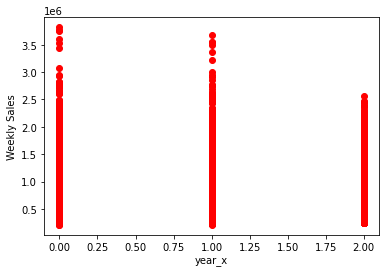

In [ ]:
#visualizing our train data distribution
plt.scatter(le_df.year_x, le_df.Weekly_Sales, color='red')
plt.xlabel("year_x")
plt.ylabel("Weekly Sales")
plt.show()

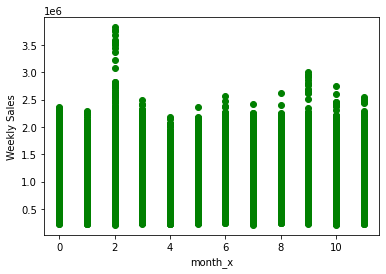

In [ ]:
plt.scatter(le_df.month_x, le_df.Weekly_Sales, color='green')
plt.xlabel("month_x")
plt.ylabel("Weekly Sales")
plt.show()

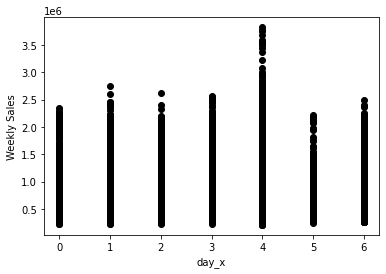

In [ ]:
plt.scatter(le_df.day_x, le_df.Weekly_Sales, color='black')
plt.xlabel("day_x")
plt.ylabel("Weekly Sales")
plt.show()

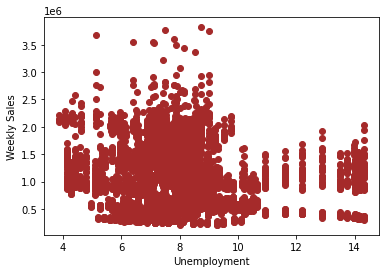

In [ ]:
plt.scatter(le_df.Unemployment, le_df.Weekly_Sales, color='brown')
plt.xlabel("Unemployment")
plt.ylabel("Weekly Sales")
plt.show()

**NB: Scaling of the dataset**

Generally, algorithms that rely on rules do not require normalization/scaling. Since we are working with algorithms that are rule-based e.g gradient boosting decision tree, scaling/normalisation is not needed.

Feature scaling is especially used for machine learning algorithms that calculate distances between data.

## UNIVARIATE ANALYSIS

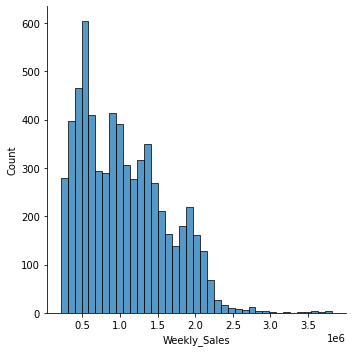

In [ ]:
sns.displot(df, x='Weekly_Sales')

## BIVARIATE ANALYSIS

In [ ]:
#temperature vs weekly sales
fig = plt.hist(df, x='Temperature', y='Weekly_Sales')
fig.show()

NameError: ignored

## MULTIVARIATE ANALYSIS

## MODELING

In [ ]:
from sklearn.metrics import r2_score , mean_squared_error

## LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

## Model performance evaluation

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
r2_score(y_test , y_pred)

In [ ]:
mean_squared_error(y_test , y_pred)

34418998859.98696

## DECISION TREE 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr =  DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dtr.predict(x_test)

## Model performance evaluation

In [ ]:
r2_score(y_test , y_pred)

0.8910750456005887

In [ ]:
mean_squared_error(y_test , y_pred)

35090671262.2916

## GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GBR = GradientBoostingRegressor (n_estimators=100,learning_rate=1)
GBR.fit(x_train , y_train)

GradientBoostingRegressor(learning_rate=1)

In [ ]:
yy_pred = GBR.predict(x_test)

## Model performance evaluation

In [ ]:
r2_score(y_test , yy_pred)

In [ ]:
mean_squared_error(y_test , yy_pred)

18933719074.934998

## Final Model Summary & Feature importance

In [ ]:
x_train = pd.DataFrame(x_train , columns = ["Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"])

In [ ]:
feature_imp = pd.Series(dtr.feature_importances_).sort_values(ascending=False)
feature_imp*100

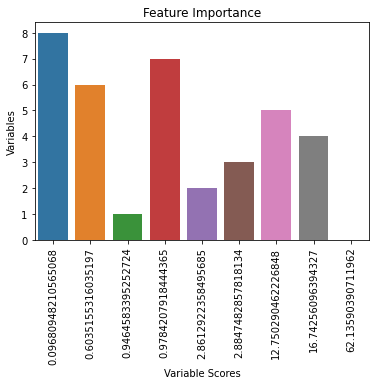

In [ ]:
sns.barplot(x= feature_imp*100, y = feature_imp.index)
plt.xlabel("Variable Scores")
plt.xticks(rotation=90)
plt.ylabel("Variables")
plt.title("Feature Importance")
plt.show()

## Actionable Insights and Recommendations

- 